In [1]:
# 라이브러리 불러오기
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep

# 시각화
from matplotlib import font_manager
from matplotlib import rc
import matplotlib.pyplot as plt

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 한글 인코딩
rc('font', family='AppleGothic')
# 마이너스 부호 출력
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 엑셀 데이터
df = pd.read_excel('excel/남북한_발전전력량.xlsx')

# 데이터 전처리 (북한의 수력,화력)
df2 = df.loc[[1,2]]
df2 = df2.drop('남북한별', axis='columns')
df2 = df2.rename({'발전 전력별':'전력별'}, axis='columns')
df2 = df2.set_index('전력별')
df2_T = df2.T
print(df2_T.info())

# 데이터 타입 변경
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(int)
print(df2_T.info())

df2_T


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수력      33 non-null     object
 1   화력      33 non-null     object
dtypes: object(2)
memory usage: 792.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   수력      33 non-null     int64
 1   화력      33 non-null     int64
dtypes: int64(2)
memory usage: 792.0 bytes
None


전력별,수력,화력
1990,156,121
1991,150,113
1992,142,105
1993,133,88
1994,138,93
1995,142,88
1996,125,88
1997,107,86
1998,102,68
1999,103,83


In [3]:
# 엑셀 데이터
df = pd.read_excel('excel/남북한_발전전력량.xlsx')

# 데이터 전처리 (북한의 수력,화력)
df2 = df.loc[[1,2], '1990':'2016']
df2 = df2.rename({1:'수력', 2:'화력'}, axis='index')
df2_T = df2.T
print(df2_T.info())

# 데이터 타입 변경
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(str)
print(df2_T.info())

# 합계
# df2_T['합계'] = df2_T['수력'].add(df2_T['화력'])
df2_T['합계'] = df2_T['수력'] + df2_T['화력']
df2_T['합계-1년'] = df2_T['합계'].shift(1)
df2_T['증감률'] = ((df2_T['합계'] - df2_T['합계-1년']) / df2_T['합계-1년']) * 100
df2_T.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수력      27 non-null     object
 1   화력      27 non-null     object
dtypes: object(2)
memory usage: 648.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   수력      27 non-null     int64
 1   화력      27 non-null     int64
dtypes: int64(2)
memory usage: 648.0+ bytes
None


,수력,화력,합계,합계-1년,증감률
1990,156,121,277,NaN,NaN
1991,150,113,263,277.0,-5.054152
1992,142,105,247,263.0,-6.083650


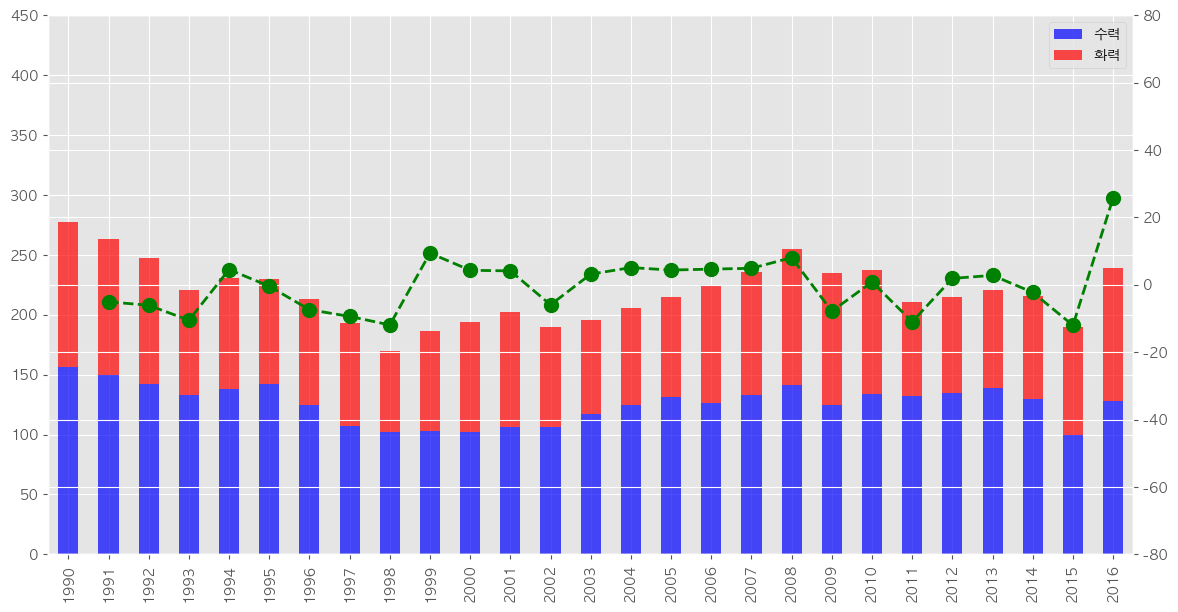

In [4]:
# 스타일
plt.style.use('ggplot')

# 그래프 
ax1 = df2_T[['수력', '화력']].plot(kind='bar', figsize=(14,7), stacked=True,
                         color=['blue', 'red'], alpha=0.7)
ax2 = ax1.twinx()
ax2.plot(df2_T['증감률'], ls='--', marker='o', color='green', linewidth=2,
         markersize=10)

# 그래프 꾸미기
ax1.set_ylim(0, 450)
ax2.set_ylim(-80, 80)

plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

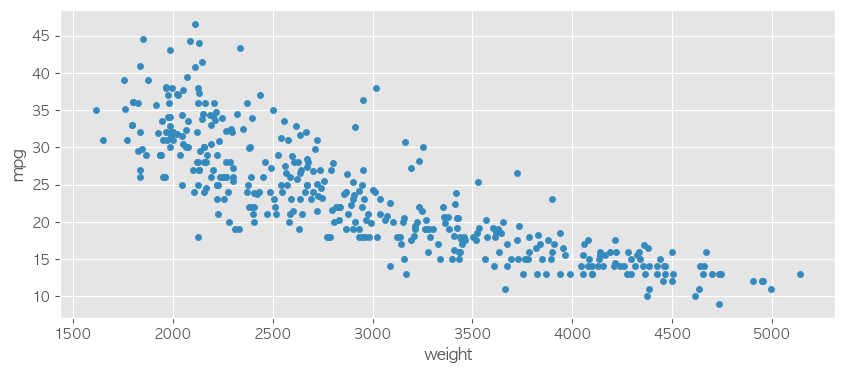

In [5]:
car = pd.read_csv('csv/auto-mpg.csv')
car.plot(kind='scatter', x='weight', y='mpg', figsize=(10,4))

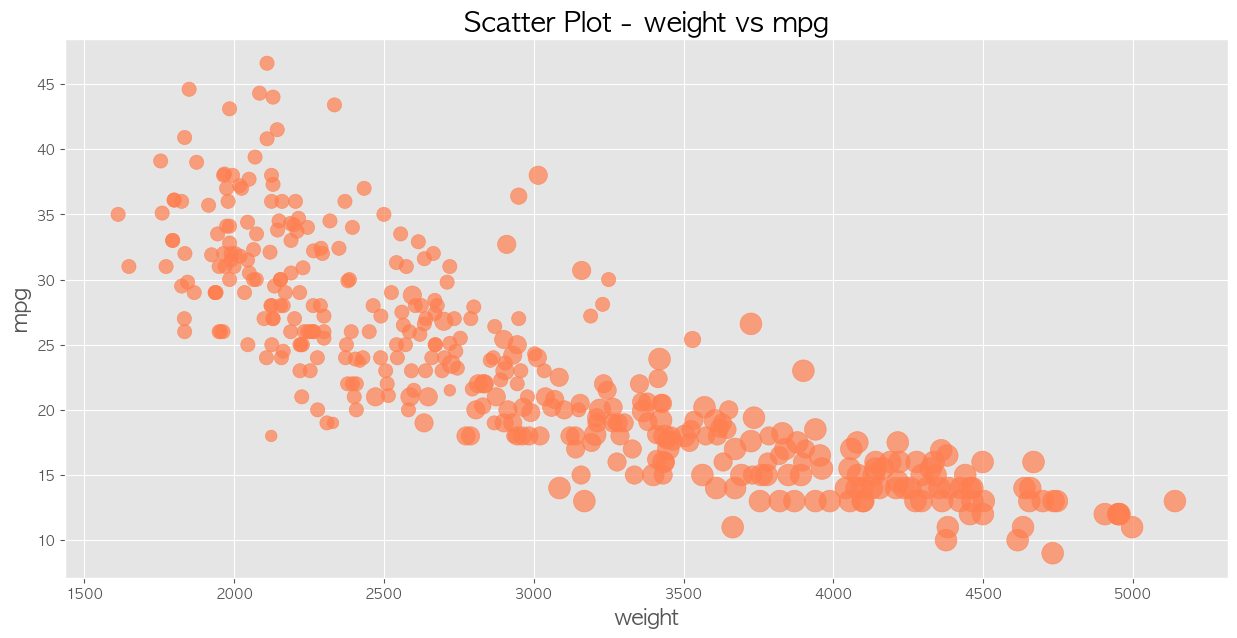

In [6]:
cyl_size = (car['cylinders'] - 1) * 35

# 모형 생성
plt.figure(figsize=(15,7))

# 그래프 생성
plt.scatter(x=car['weight'], y=car['mpg'], c='coral', s=cyl_size, alpha=0.7)

# 그래프 꾸미기
plt.xlabel('weight', size=16)
plt.ylabel('mpg', size=16)
plt.title('Scatter Plot - weight vs mpg', size=20)

# 출력
plt.show()

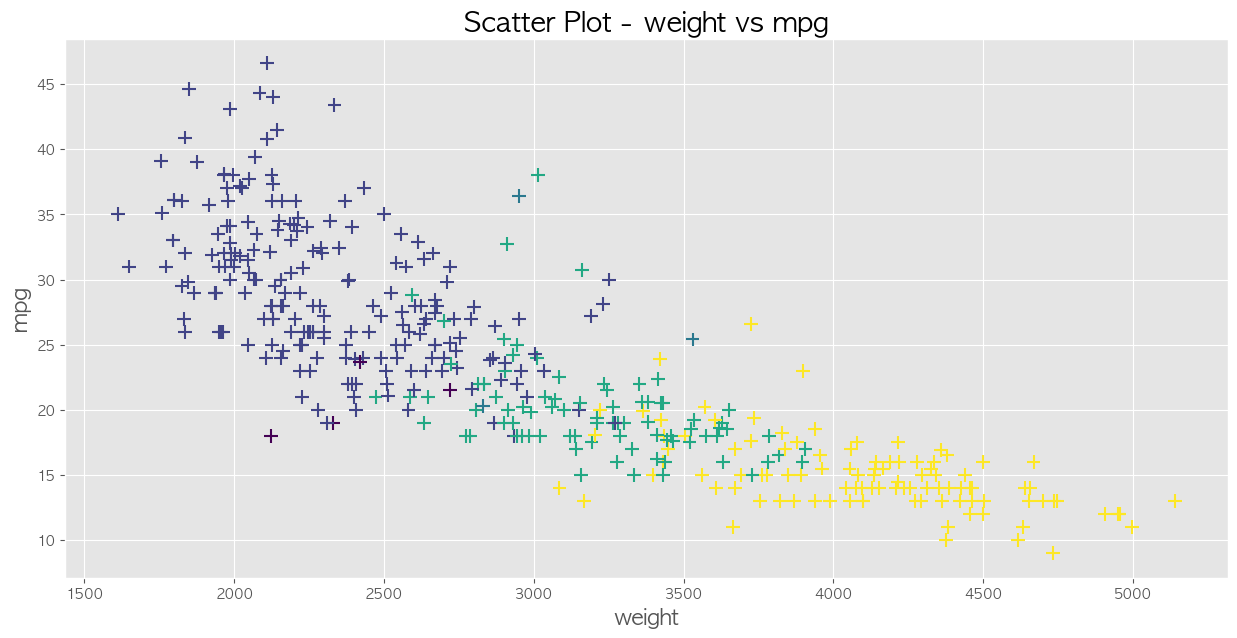

In [7]:
cyl_size = (car['cylinders'] - 1) * 35

# 모형 생성
plt.figure(figsize=(15,7))

# 그래프 생성
plt.scatter(x=car['weight'], y=car['mpg'], marker='+', s=100, cmap='viridis', c=cyl_size)

# 그래프 꾸미기
plt.xlabel('weight', size=16)
plt.ylabel('mpg', size=16)
plt.title('Scatter Plot - weight vs mpg', size=20)

# 출력
plt.show()

In [14]:
# 복제본
car2 = car.copy()

# count 컬럼 생성
car2['count'] = 1
car2.groupby('origin')['count'].sum() / len(car2.index)

origin
1    0.625628
2    0.175879
3    0.198492
Name: count, dtype: float64

In [19]:
# 
car_origin = car['origin'].value_counts()
car_origin = car_origin.rename({1:'USA', 2:'EU', 3:'JPN'})
car_origin

origin
USA    249
JPN     79
EU      70
Name: count, dtype: int64

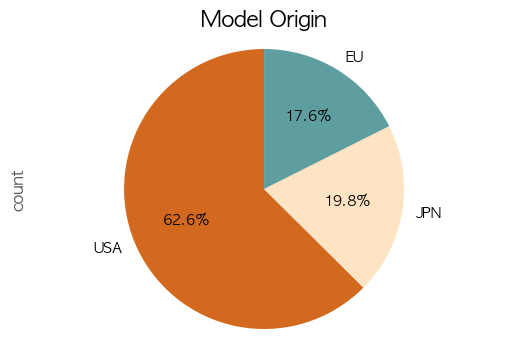

In [30]:
# 파이 그래프 생성
ax = car_origin.plot(kind='pie', autopct='%.1f%%', figsize=(6,4), startangle=90, colors=['chocolate', 'bisque', 'cadetblue'])
ax.set_title('Pie Plot - Car Origin')

# 그래프 꾸미기
plt.title('Model Origin', size=16)
plt.axis('equal')

# 출력
plt.show()

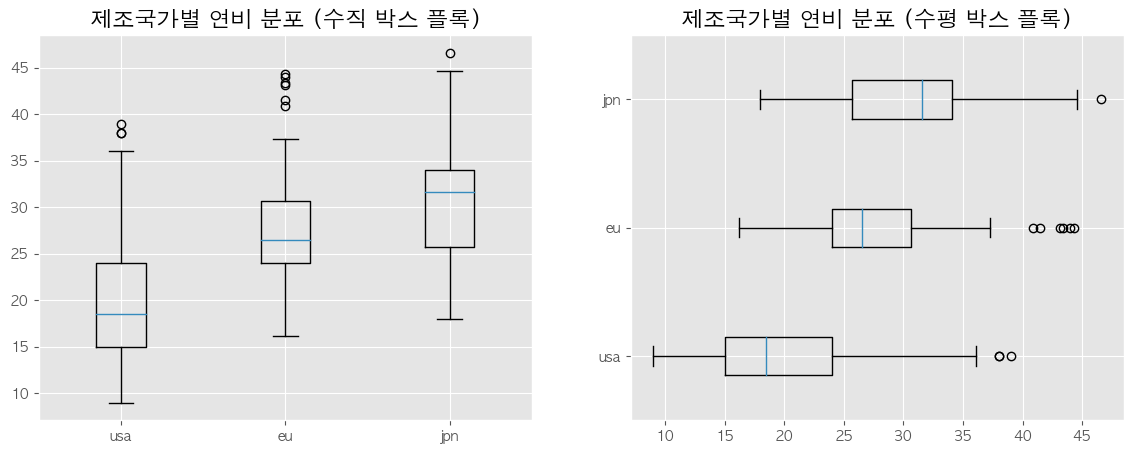

In [46]:
'''
    Origin 컬럼을 국가(대륙)별로 나누어 목록화
'''
# USA
mask_usa = car['origin'] == 1
mpg_usa = car['mpg'][mask_usa]
# EU
mask_eu = car['origin'] == 2
mpg_eu = car['mpg'][mask_eu]
# JPA
mask_jpn = car['origin'] == 3
mpg_jpn = car['mpg'][mask_jpn]
# total
mpg_list = [mpg_usa, mpg_eu, mpg_jpn]


# 도형 생성
figure = plt.figure(figsize=(14,5))

# 서브플롯 생성
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

# 
ax1.boxplot(x=mpg_list, vert=True, labels=['usa', 'eu', 'jpn'])
ax2.boxplot(x=mpg_list, vert=False, labels=['usa', 'eu', 'jpn'])

# 그래프 꾸미기
ax1.set_title('제조국가별 연비 분포 (수직 박스 플록)', size=16)
ax2.set_title('제조국가별 연비 분포 (수평 박스 플록)', size=16)

# 출력
plt.show()